In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Overview of our dataset

In [2]:
# Download the data of Davidson
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df = pd.read_csv(url,index_col=0,parse_dates=[0],encoding='ISO-8859-1')

The data are stored as a CSV and as a pickled pandas dataframe (Python 2.7). Each data file contains 5 columns:

count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

hate_speech = number of CF users who judged the tweet to be hate speech.

offensive_language = number of CF users who judged the tweet to be offensive.

neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [3]:
np.random.seed(42)
df.head(5)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [5]:
df["hate_speech"].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

In [6]:
df["class"].value_counts() 
#1430 tweets considered as hateful content

1    19190
2     4163
0     1430
Name: class, dtype: int64

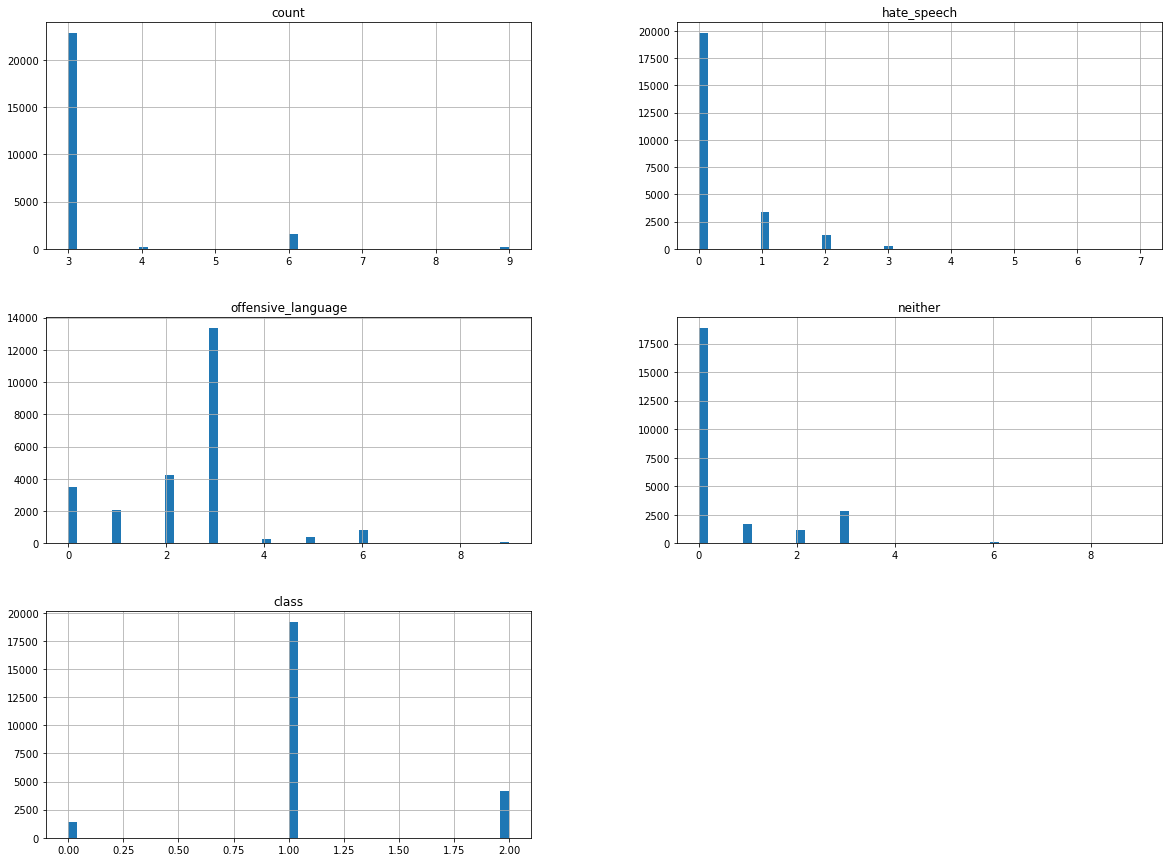

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#No missing values
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,count,hate_speech,offensive_language,neither,class,tweet


In [9]:
df = df.drop(columns=['count','hate_speech','offensive_language','neither'])

# Visualization of our datasets

## Visualization of the most frequent words

In [10]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


(-0.5, 399.5, 199.5, -0.5)

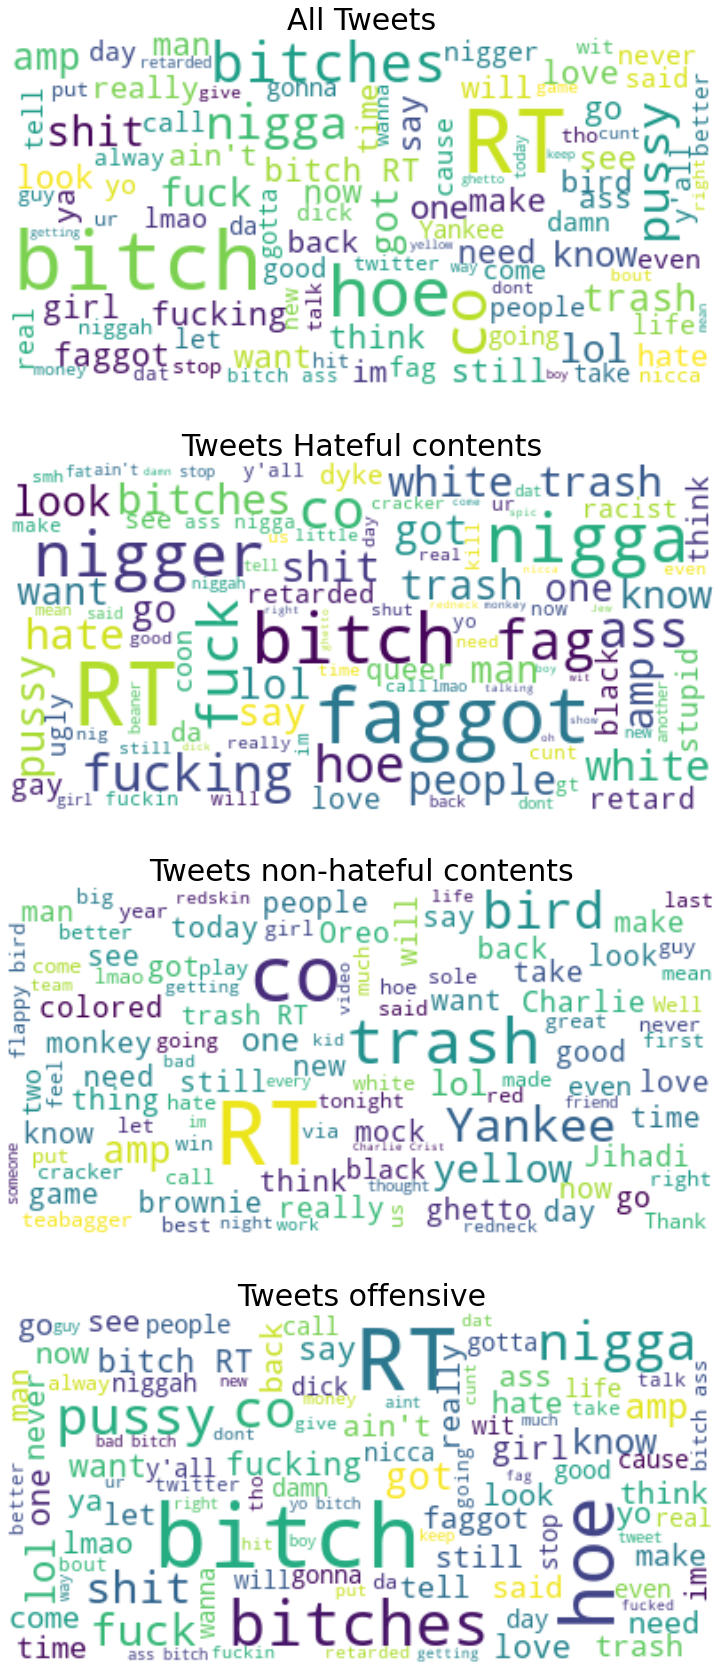

In [11]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Start with one review:
df_hateful = df[df['class']==0]
df_nonhateful = df[df['class']==2]
df_offensive = df[df['class']==1]
tweet_All = " ".join(review for review in df.tweet)
tweet_hateful = " ".join(review for review in df_hateful.tweet)
tweet_nonhateful = " ".join(review for review in df_nonhateful.tweet)
tweet_offensive = " ".join(review for review in df_offensive.tweet)

fig, ax = plt.subplots(4, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_hateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_nonhateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_nonhateful)
wordcloud_offensive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_offensive)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_hateful, interpolation='bilinear')
ax[1].set_title('Tweets Hateful contents',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_nonhateful, interpolation='bilinear')
ax[2].set_title('Tweets non-hateful contents',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_offensive, interpolation='bilinear')
ax[3].set_title('Tweets offensive',fontsize=30)
ax[3].axis('off')

In [12]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['tweet'].apply(word_count)
df.head(3)

,class,tweet,word count
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,25
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,16
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,21


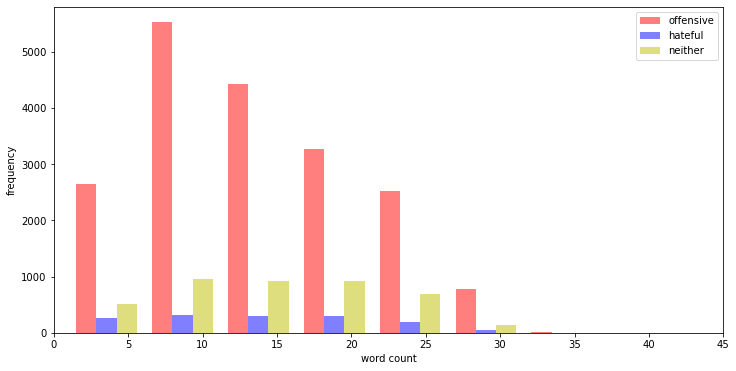

In [13]:
# plot word count distribution for both positive and negative sentiments
x = df['word count'][df['class'] == 1]
y = df['word count'][df['class']  == 0]
z = df['word count'][df['class']  == 2]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y,z], color=['r','b','y'], alpha=0.5, label=['offensive','hateful','neither'])
plt.legend(loc='upper right')

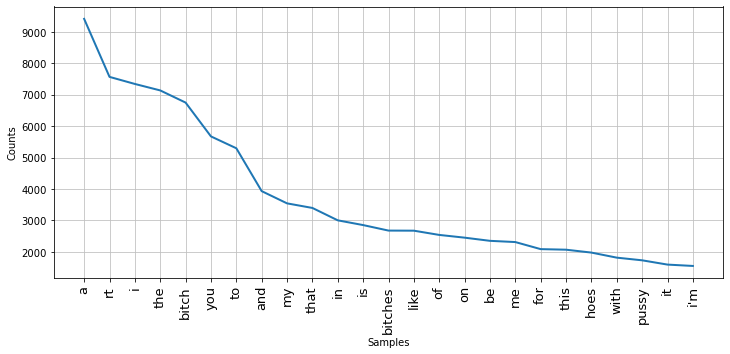

NameError: name 'Counter' is not defined

In [15]:
# most common words in twitter dataset
all_words = []
for line in list(df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 

word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Remove punctuation & other characters¶

### Remove stopwords & tokenization
we do have some words in the dataset that are common in natural human language but used in most sentence compositions that we would be better left off since they bring no useful features to our model.

After removing stop-words we split all the sentences in the dataset to get individual words (tokens) which is basically a list of words per sentence contained in the newly processed tweet. Now we can see that we have two new columns in the dataframe that contains these tokenized versions of a tweet.

In [ ]:
string.punctuation ##what we want to delete from tweets

In [16]:
from nltk.corpus import stopwords
def remove_punct(text):
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    text  = [char for char in list(text) if char not in string.punctuation]
    text = ''.join(text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub(mention_regex, '',text)
    text = re.sub(giant_url_regex, '',text)
    # To lowercase
    text = text.lower()
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
    return [word for word in text.lower().split() if word.lower() not in stopwords.words('english')]

In [17]:
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['tweet'].apply(remove_punct) 

# Vectorization (Bag-of-words)

In [18]:
# vectorize
bow_transformer = CountVectorizer(analyzer=remove_punct).fit(df['tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# example of vectorized text
sample_tweet = df['tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')

36320
"@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn


  (0, 1114)	1
  (0, 2992)	1
  (0, 7418)	1
  (0, 10500)	1
  (0, 10819)	1
  (0, 12640)	1
  (0, 12725)	1
  (0, 15732)	1
  (0, 31493)	1
  (0, 34132)	1
  (0, 36045)	1




In [19]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(df['tweet'])
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (24783, 36320)
Amount of Non-Zero occurences:  212357


# IDTif 
* weight of words depending on the frequency of their appearence based on the BoW

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 36045)	0.17656260483583813
  (0, 34132)	0.3658303487126007
  (0, 31493)	0.3806348590924486
  (0, 15732)	0.3806348590924486
  (0, 12725)	0.315213393398041
  (0, 12640)	0.13228328739293466
  (0, 10819)	0.22683990732707793
  (0, 10500)	0.1718323659169749
  (0, 7418)	0.3553263814351687
  (0, 2992)	0.3806348590924486
  (0, 1114)	0.2761289921175118


In [21]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(24783, 36320)


# Model

## Naive-Bayes Model with TDiDF transformer

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.2)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB())  # train on TF-IDF vectors w/ Naive Bayes classifier
])
    
# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)], #use unigram and bigrams
              'tfidf__use_idf': (True, False), #try with weight or not
              'classifier__alpha': (1e-2, 1e-3),
             }
    
# do 10-fold cross validation for each of the 6 possible combinations of the above params
    
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1) 
grid.fit(X_train,y_train)
    
# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   55.1s finished



Best Model: 0.855039 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.834208 Stdev:(0.004274) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.847171 Stdev:(0.005214) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.827399 Stdev:(0.004839) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.842329 Stdev:(0.005388) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.848583 Stdev:(0.004456) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.855039 Stdev:(0.003204) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.842984 Stdev:(0.003962) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.849037 Stdev:(0.003841) with: {'bow__ngram_range'

We passed a combined 8 parameters to the GridsearchCV object and 10 folds for the cross validation which means that for every parameter combination, the grid will run 10 different iterations with a different test set every time.

## SVM with TDiDF transformer¶
https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

SVM = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier(loss='hinge', penalty='l2',
                                              random_state=42)),])

_ = SVM.fit(X_train, y_train)
predicted_svm = SVM.predict(X_train)
np.mean(predicted_svm == y_train)

0.9357913850499344

In [25]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
}
gs_clf_svm = GridSearchCV(SVM, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X_train, y_train)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

{'classifier__alpha': 0.001,
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 1)}

In [ ]:
# LSTM 

In [ ]:
https://xiangyutang2.github.io/tweet-classification/
https://towardsdatascience.com/building-a-user-classifier-using-twitter-data-283dfd0c0e59

In [ ]:
# Bert Model

# Evaluation

In [ ]:
pip install --user joblib

In [36]:
import joblib as joblib
from sklearn.metrics import classification_report

# save best model to current working directory
joblib.dump(grid, "twitter_hateful_NB.pkl")
joblib.dump(gs_clf_svm, "twitter_hateful_SVM.pkl")
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_hateful_NB.pkl" )
model_SVM = joblib.load("twitter_hateful_SVM.pkl" )
# get predictions from best model above
y_preds = model_NB.predict(X_test)
y_preds2 = model_SVM.predict(X_test)

print(classification_report(y_test, y_preds)) ##Naive Bayes Model
print(classification_report(y_test, y_preds2)) ## SVM

              precision    recall  f1-score   support

           0       0.52      0.11      0.18       290
           1       0.86      0.98      0.91      3832
           2       0.88      0.54      0.67       835

    accuracy                           0.86      4957
   macro avg       0.75      0.54      0.59      4957
weighted avg       0.84      0.86      0.83      4957

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.85      0.98      0.91      3832
           2       0.83      0.52      0.64       835

    accuracy                           0.85      4957
   macro avg       0.56      0.50      0.52      4957
weighted avg       0.80      0.85      0.81      4957



https://towardsdatascience.com/multiclass-classification-with-word-bags-and-word-sequences-4fffd4d62e0c